In [211]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [193]:
root_url = "Data/DELTA BURNS BOG.csv"
Data = pd.read_csv(root_url)
# Data = Data.loc[]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12,14,18,20,22,28,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [194]:
Data = (Data[['TEMP', 'DEW_POINT_TEMP','RELATIVE_HUMIDITY']].dropna())
print(Data.shape)

(66513, 3)


In [239]:
X = Data[['TEMP', 'DEW_POINT_TEMP']].values
Y = Data['RELATIVE_HUMIDITY'].values.reshape(-1,1)

x_test = Data.loc[Data['RELATIVE_HUMIDITY']>=95,['TEMP', 'DEW_POINT_TEMP']].values
x_train = Data.loc[Data['RELATIVE_HUMIDITY']<95,['TEMP', 'DEW_POINT_TEMP']].values
y_test = Data.loc[Data['RELATIVE_HUMIDITY']>=95,'RELATIVE_HUMIDITY'].values
y_train = Data.loc[Data['RELATIVE_HUMIDITY']<95,'RELATIVE_HUMIDITY'].values

print(x_train.shape)
print(x_test.shape)

(40232, 2)
(26281, 2)


In [240]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)
    conv1 = keras.layers.Dense(64, activation='relu',
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",)(input_layer)
#     conv1 = keras.layers.BatchNormalization()(conv1)
#     conv1 = keras.layers.ReLU()(conv1)

    output_layer = keras.layers.Dense(1)(conv1)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [241]:
epochs = 250
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1),
]

model.compile(
    optimizer="adam",
    loss="mean_squared_error",
)

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/250
1006/1006 [==============================] - 2s 2ms/step - loss: 1695.2905 - val_loss: 1270.6602
Epoch 2/250
1006/1006 [==============================] - 1s 1ms/step - loss: 507.6159 - val_loss: 122.0842
Epoch 3/250
1006/1006 [==============================] - 1s 1ms/step - loss: 26.8517 - val_loss: 10.6311
Epoch 4/250
1006/1006 [==============================] - 1s 1ms/step - loss: 4.5775 - val_loss: 4.3088
Epoch 5/250
1006/1006 [==============================] - 1s 1ms/step - loss: 1.8407 - val_loss: 1.8348
Epoch 6/250
1006/1006 [==============================] - 1s 1ms/step - loss: 0.7540 - val_loss: 0.9318
Epoch 7/250
1006/1006 [==============================] - 2s 2ms/step - loss: 0.4274 - val_loss: 0.6205
Epoch 8/250
1006/1006 [==============================] - 1s 1ms/step - loss: 0.3302 - val_loss: 0.4942
Epoch 9/250
1006/1006 [==============================] - 1s 1ms/step - loss: 0.2816 - val_loss: 0.3952
Epoch 10/250
1006/1006 [==============================] - 1s 

In [242]:
model = keras.models.load_model("best_model.h5")

test_loss = model.evaluate(x_train, y_train)

# print("Test accuracy", test_acc)
print("Test loss", test_loss)


# print(x_train)
# print(y_train)

1258/1258 [==============================] - 1s 988us/step - loss: 0.1372
Test loss 0.13724437355995178


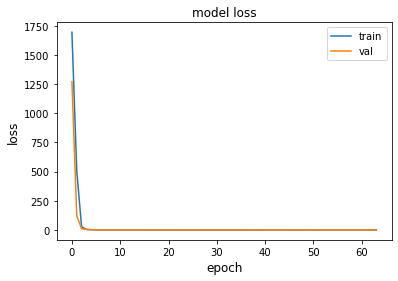

In [243]:
metric = "loss"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()



0.9289420796465098


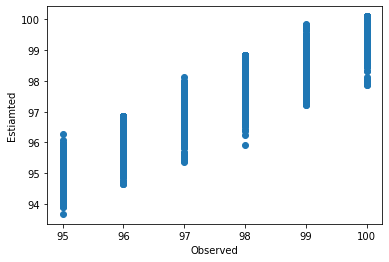

In [248]:
pred = model.predict(x_test)
# print(x_train[:100].shape)

plt.figure()
plt.scatter(y_test,pred)
plt.ylabel('Estiamted')
plt.xlabel('Observed')
print(metrics.r2_score(pred,y_test))

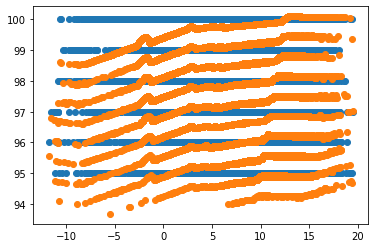

In [246]:
plt.figure()
plt.scatter(x_test[:,0],y_test)
plt.scatter(x_test[:,0],pred)